# Lab 8: DESPLIEGUE (puesta en producción)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [69]:
data = pd.read_csv('./houses_to_rent_v2.csv')

In [70]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Procesamiento de Datos

### Encoding

In [71]:
data['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [72]:
from sklearn.preprocessing import LabelBinarizer

data['animal'] = LabelBinarizer().fit_transform(data['animal'])
data['furniture'] = LabelBinarizer().fit_transform(data['furniture'])
uniques = {val:index for index, val in enumerate(data['city'].unique())}
coding = [[city, uniques[city]] for city in data['city']]
data['city'] = [val[1] for val in coding]
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,0,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,1,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,1,51,2,1,0,2,0,1,270,1112,22,17,1421
4,0,25,1,1,0,1,1,1,0,800,25,11,836


### Limpiar valores no numericos

In [73]:
for colum in data.columns:
    col = data[colum]
    indexes = []
    for index, val in enumerate(col):
        if type(val) not in [int, float]:
            indexes.append(index)

    if len(indexes) > 0:
        print(f'> non numeric value in {colum}, lines: {indexes} ')

> non numeric value in floor, lines: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

In [74]:
data['floor'].replace('-', 0)
data['floor'] = [int(val) if val != '-' else 0 for val in X['floor']]
data[['floor']]

,floor
0,7
1,20
2,6
3,2
4,1
...,...
10687,5
10688,17
10689,8
10690,8


### Train Split

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = data.copy()
X.drop(['total (R$)'], axis=1)
# X = X.to_numpy()
y = data['total (R$)']

In [76]:

X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 101
)

### Cambiar la escala de los datos - Normalizar

In [77]:
normalizador = MinMaxScaler()


In [78]:
normalizador.fit(X_entreno.values)

MinMaxScaler()

In [79]:
X_entreno_normalizado = normalizador.transform(X_entreno.values)

In [80]:
X_prueba_normalizado = normalizador.transform(X_prueba.values)

## Modelo


### Crear el Modelo

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

KeyboardInterrupt: 

In [ ]:
modelo = Sequential()
modelo.add(Dense(units = 4,
                 activation = 'relu',
                 input_shape = [4,]))

# Ultima capa para clasificación multi-clase              
#    de las tres especies
modelo.add(Dense(units = 3,
                 activation = 'softmax'))

modelo.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Entrenamiento del Modelo

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
detencion_temprana = EarlyStopping(patience = 10)

In [ ]:
modelo.fit(x = X_entreno_normalizado, 
          y = y_entreno, 
          epochs = 300,
          validation_data = (X_prueba_normalizado, 
                             y_prueba), 
          verbose = 1 , 
          callbacks = [detencion_temprana]
          )

Epoch 1/300
4/4 [==============================] - 0s 19ms/step - loss: 1.0248 - accuracy: 0.6833 - val_loss: 1.0607 - val_accuracy: 0.5667
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0215 - accuracy: 0.6833 - val_loss: 1.0581 - val_accuracy: 0.5667
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0184 - accuracy: 0.6833 - val_loss: 1.0555 - val_accuracy: 0.5667
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0154 - accuracy: 0.6833 - val_loss: 1.0530 - val_accuracy: 0.5667
Epoch 5/300
1/4 [======>.......................] - ETA: 0s - loss: 0.9766 - accuracy: 0.6875

2023-10-13 10:39:38.147266: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 3ms/step - loss: 1.0124 - accuracy: 0.6833 - val_loss: 1.0505 - val_accuracy: 0.5667
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0094 - accuracy: 0.6833 - val_loss: 1.0481 - val_accuracy: 0.5667
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0062 - accuracy: 0.6833 - val_loss: 1.0458 - val_accuracy: 0.5667
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0033 - accuracy: 0.6833 - val_loss: 1.0437 - val_accuracy: 0.5667
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0001 - accuracy: 0.6833 - val_loss: 1.0416 - val_accuracy: 0.5667
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9970 - accuracy: 0.6833 - val_loss: 1.0393 - val_accuracy: 0.5667
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9936 - accuracy: 0.6833 - val_loss: 1.0368 - val_accuracy: 0.5667
Epoch 12/300
4/4 [===================

## Evaluación del Modelo

In [ ]:
metricas = pd.DataFrame(modelo.history.history)

In [ ]:
metricas

,loss,accuracy,val_loss,val_accuracy
0,1.024777,0.683333,1.060673,0.566667
1,1.021513,0.683333,1.058108,0.566667
2,1.018391,0.683333,1.055492,0.566667
3,1.015431,0.683333,1.052984,0.566667
4,1.012361,0.683333,1.050480,0.566667
...,...,...,...,...
295,0.493768,0.833333,0.540392,0.900000
296,0.492957,0.833333,0.539213,0.900000
297,0.492038,0.841667,0.538346,0.900000
298,0.491271,0.841667,0.537508,0.900000


<Axes: >

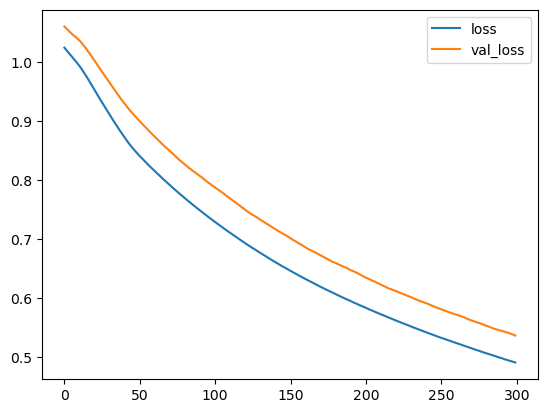

In [ ]:
metricas[['loss', 'val_loss']].plot()

<Axes: >

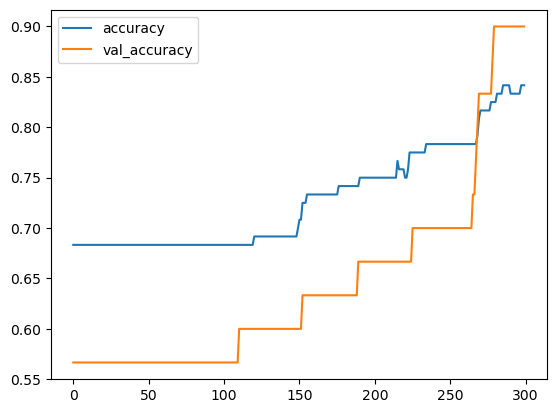

In [ ]:
metricas[['accuracy', 'val_accuracy']].plot()

In [ ]:
modelo.evaluate(X_prueba_normalizado,
                y_prueba,
                verbose = 2)

1/1 - 0s - loss: 0.5363 - accuracy: 0.9000 - 8ms/epoch - 8ms/step


[0.5362784266471863, 0.8999999761581421]

## Preparar el Modelo para Despliegue (o puesta en producción)

In [ ]:
epocas = len(metricas)

### Notar que el ajuste se hace con todos los datos

In [ ]:
X_normalizado = normalizador.fit_transform(X.values)

In [ ]:
X_normalizado

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
modelo = Sequential()
modelo.add(Dense(units = 4,
                 activation = 'relu',
                input_shape = X_normalizado.shape[1:]))

# Ultima capa para clasificación multi-clase
#   de las tres especies
modelo.add(Dense(units = 3,
                 activation = 'softmax'))

modelo.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
modelo.fit(X_normalizado, y, epochs = epocas)

Epoch 1/300
5/5 [==============================] - 0s 658us/step - loss: 1.1124 - accuracy: 0.3067
Epoch 2/300
5/5 [==============================] - 0s 578us/step - loss: 1.1105 - accuracy: 0.3067
Epoch 3/300
5/5 [==============================] - 0s 565us/step - loss: 1.1087 - accuracy: 0.3067
Epoch 4/300
5/5 [==============================] - 0s 676us/step - loss: 1.1070 - accuracy: 0.3133
Epoch 5/300
5/5 [==============================] - 0s 740us/step - loss: 1.1056 - accuracy: 0.3133
Epoch 6/300
5/5 [==============================] - 0s 578us/step - loss: 1.1040 - accuracy: 0.3133
Epoch 7/300
5/5 [==============================] - 0s 744us/step - loss: 1.1026 - accuracy: 0.3133
Epoch 8/300
5/5 [==============================] - 0s 546us/step - loss: 1.1011 - accuracy: 0.3133
Epoch 9/300
5/5 [==============================] - 0s 525us/step - loss: 1.0997 - accuracy: 0.3133
Epoch 10/300
5/5 [==============================] - 0s 447us/step - loss: 1.0984 - accuracy: 0.3133
Epoch 11/

In [ ]:
modelo.save("modelo_final_iris.h5")

### Guardar el Normalizador

In [ ]:
import joblib

In [ ]:
joblib.dump(normalizador,'normalizador_iris.pkl')

['normalizador_iris.pkl']

## Proceso para predecir una flor nueva

In [ ]:
from tensorflow.keras.models import load_model

**NOTA**

Puede ser que las siguientes instrucciones causen un error:

AttributeError: 'str' object has no attribute 'decode'

Si este es el caso hay que bajar la versión del paquete hp5y.  Se puede hacer de la siguiente forma:

pip install 'h5py==2.10.0' --force-reinstall

o con Conda:

conda install 'h5py==2.10.0'

In [ ]:
modelo_flor = load_model("modelo_final_iris.h5")
normalizador_flor = joblib.load("normalizador_iris.pkl")

In [ ]:
iris.head(1)

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa


In [ ]:
muestra_flor = {'long_sepalo':5.1,
                 'ancho_sepalo':3.5,
                 'long_petalo':1.4,
                 'ancho_petalo':0.2}

In [ ]:
muestra_flor.keys()

dict_keys(['long_sepalo', 'ancho_sepalo', 'long_petalo', 'ancho_petalo'])

In [ ]:
codificador.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

### La siguiente función utiliza una llamada para predecir la clase en base a datos en una estructura jason

A partir del 2021 cambio la forma de hacer la llamada y esta es la indicación:

model.predict_classes() is deprecated and will be removed after 2021-01-01. 

Please use instead: 

**np.argmax(model.predict(x), axis=-1)**, 

if your model does multi-class classification (e.g. if it uses a softmax last-layer activation). 

**(model.predict(x) > 0.5).astype("int32")**, 

if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

In [ ]:
def devuelve_prediccion(modelo, normalizador, muestra_json):
    
    # Si fueran muchas más características,
    #   probablemente sería bueno codificar
    #   una iteración que contruya este arreglo
    
    long_sep = muestra_json['long_sepalo']
    ancho_sep = muestra_json['ancho_sepalo']
    long_pet = muestra_json['long_petalo']
    ancho_pet = muestra_json['ancho_petalo']
    
    flor = [[long_sep, ancho_sep,
             long_pet, ancho_pet]]
    
    flor = normalizador.transform(flor)
    
    clases = np.array(['Iris-setosa', 
                       'Iris-versicolor', 
                       'Iris-virginica'])
    
    #clase_ind = modelo.predict_classes(flor)
    clase_ind = np.argmax(modelo.predict(flor), axis = -1)    
    
    return clases[clase_ind][0]                

In [ ]:
devuelve_prediccion(modelo_flor,
                    normalizador_flor,
                    muestra_flor)

1/1 [==============================] - 0s 32ms/step


'Iris-setosa'

# CODIGO PARA DESPLIEGUE:

Ponerlo todo en una sola celda para copiarlo ya que será necesario crear un script .py|

In [ ]:
from tensorflow.keras.models import load_model
import joblib


modelo_flor = load_model("modelo_final_iris.h5")
normalizador_flor = joblib.load("normalizador_iris.pkl") 

def devuelve_prediccion(modelo, nomalizador, muestra_json):
    
    # Si fueran muchas más características,
    #   probablemente sería bueno codificar
    #   una iteración que contruya este arreglo
    
    long_sep = muestra_json['long_sepalo']
    ancho_sep = muestra_json['ancho_sepalo']
    long_pet = muestra_json['long_petalo']
    ancho_pet = muestra_json['ancho_petalo']
    
    flor = [[long_sep, ancho_sep,
             long_pet, ancho_pet]]
    
    flor = normalizador.transform(flor)
    
    clases = np.array(['Iris-setosa', 
                       'Iris-versicolor', 
                       'Iris-virginica'])
    
    clase_ind = modelo.predict_classes(flor)
    
    return clases[clase_ind][0]

    

In [ ]:
muestra_flor = {'long_sepalo':5.1,
                 'ancho_sepalo':3.5,
                 'long_petalo':1.4,
                 'ancho_petalo':0.2}